# Convex Functions

`convex` &mdash; a real valued function is convex if the line segment between any two points on the graph of the function lies above or on the graph. Think of a hexagon, or a circle. 

Both the function, and the constraints have to be `convex` in order to use a convex optimization model.

---
<b>A more formal definition</b>
A function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ is `convex` if:
$$f(\lambda x + (1-\lambda)y) \le \lambda f(x) + (1 - \lambda) f(y) \forall x, y \in \mathbb{R}^n and \lambda \in [0, 1]$$

So essentially, the function value at the average is $\le$ average of funtion values. 

Examples of convex functions:
* $f(x) = x^2$
* $f(x) = \mathbf{a}^T\mathbf{x} + b$ — a linear function is both `convex` and `concave`
* $f(x) = \sum_{j=1}^n |x_j|$
* $f(x) = e^x + x^2$
    * $f'(x) = e^x + 2x$
    * $f''(x) = e^x + 2 \ge 0 ~\forall~x$
* $f(x) = ||A\mathbf{x}-\mathbf{b}||^2$
 * $\nabla f(x) = 2A^T(A\mathbf{x} - \mathbf{b})$
 * $\nabla^2 f(x) = 2A^TA$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [1]:
def is_convex(f):
    convex = True
    
    for _ in range(1000):
        l = np.random.rand() # define lambda
        x = np.random.randint(100)
        y = np.random.randint(100)
        
        convex = convex and f(l * x + (1 - l) * y) <= l*f(x) + (1 - l)*f(y)
    return convex

Is convex: True


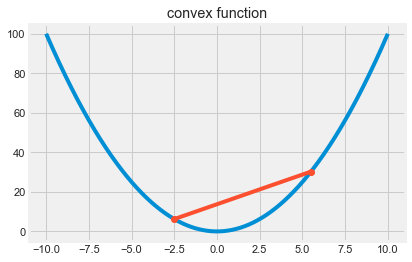

In [4]:
f = lambda x: x ** 2
x = np.linspace(-10, 10, 1000)
sns.lineplot(x=x, y=f(x));
plt.plot([-2.5, 5.5], [f(-2.5), f(5.5)], marker='o');
plt.title("convex function");
print(f"Is convex: {is_convex(f)}")

A function $f$ is `concave` if $-f$ is convex, i.e. the inqueality is reverse.

Is convex: False


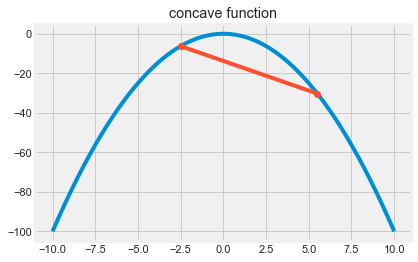

In [3]:
f = lambda x: -x ** 2
x = np.linspace(-10, 10, 1000)
sns.lineplot(x=x, y=f(x));
plt.plot([-2.5, 5.5], [f(-2.5), f(5.5)], marker='o');
plt.title("concave function");
print(f"Is convex: {is_convex(f)}")

### Operations that preserve convexity
* Nonnegative weighted sum of `convex` functions is `convex`
* Maximum of `convex` functions is `convex`

### Checking convexity
This is generally difficult, so it's easier to break the function down into it's simple constitutients and check the convexity of those parts individually

In general, one can try:
* Apply the definition
* If twice differentiable, check second order condition
* Show that the function is obtained by applying convexity preserving operations to simple `convex` functions.

### First Order Condition
* A differentiable function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is `convex` iff:
$$f(y) \ge f(x) + \nabla f(x)^T(y-x) ~~\forall x, y \in \mathbb{R}^n$$

That is, the first order [taylor's approximation](http://localhost:8888/notebooks/concepts/calculus/taylors_approximation.ipynb) is a glonal under-estimator. Recall that the `taylor's approximation` is an approximation of the actual function. The formula tells us that at any point $x$, and $y$, that the approximation will lie below. 

### Second Order Condition
* A twice differentiable function $f: \mathbb{R} \rightarrow \mathbb{R}$ is `convex` if $f''(x) \ge 0$ — the slopes (gradients) are non-decreasing. 
* A twice differentiable function $f: \mathbb{R} \rightarrow \mathbb{R}$ is `convex` iff it's [hessian matrix](http://localhost:8888/notebooks/concepts/linear-algebra/hessian_matrix.ipynb) $\nabla^2f(x)$ is `positive semidefinite` $\forall x \in \mathbb{R}^n$
* A $n \times n$ matrix $A$ is `psd` if $x^TAx \ge 0 ~~\forall  x \in \mathbb{R}^n$
* Equivalently, $A$ is `psd` if all its eigenvalues are nonnegative. 